# Clustering of Documents:

### What this notebook does (as of now): 
Loads the text files from a corpus, preprocesses the files, breaks the books into small paragraphs or chunks. TF-IDF vectors have been calculated for each chunk. K Means clustering was performed based on these TF-IDF vectors. We started with K=10 and will try larger and smaller K's. 

We begin by importing libraries and modules that I will use in this section. 

In [1]:
import nltk
import os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
import random
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()

### Loading the text and Pre-Processing.

A function to load a book given the folder and filename. 

In [24]:
def loadBook(folder,filename):
    filepath=folder + "/" + filename
    f=open(filepath)
    raw=f.read()
    return(raw)

Basic preprocessing of a book. Stemming needs to be added. 

In [25]:
def preProcess(book):
    book=book.strip()
    words=nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(book)
    words=[w.lower() for w in words if w not in stopwords.words('english')]
    words=[lemmatizer.lemmatize(w) for w in words if len(w)>1]
    return(words)

A function that converts a given book into smaller chunks. 

In [26]:
def createChunks(words,filename,text_list,id_list):
    i=0
    count=0
    while(i<len(words)):
        if((i+1000)<len(words)):
            chunk=words[i:i+1000]
            chunk=" ".join(chunk)
        else:
            chunk=words[i:len(words)]
            chunk=" ".join(chunk)
        i=i+1000
        count=count+1
        text_list.append(chunk)
        id_list.append(filename + "-" + str(count))
    return(text_list,id_list)

Loading Karl Marx's books into a list. 

In [27]:
marx_books=[]
marx_id=[]
folder="MarxText"

In [28]:
for file in os.listdir(folder):
    print(file)
    book=loadBook(folder,file)
    words=preProcess(book)
    createChunks(words,file,marx_books,marx_id)

A1-CritiqueofHegel'sPhilosophyOfRight.txt
A1-ThePovertyOfPhilosophy.txt
A1-TheGermanIdeology.txt
A1-CapitalVol1.txt
A1-EconomicPhilosophicManuscripts.txt


Loading Hegel's books into a list. 

In [29]:
hegel_books=[]
hegel_id=[]
folder="HegelText"

In [30]:
for file in os.listdir(folder):
    print(file)
    book=loadBook(folder,file)
    words=preProcess(book)
    createChunks(words,file,hegel_books,hegel_id)

A2-Phenomenology of Mind.txt
A2-Philosophy of Mind.txt
A2-Philosophy of Spirit.txt
A2-Science of Logic.txt


In [31]:
len(marx_id)

309

In [32]:
len(hegel_id)

210

Combining both the lists into one large list.

In [33]:
books=marx_books+hegel_books
ids=marx_id+hegel_id

Iterate over the list and merge any chunks if they are small in length (last chunk of a book may be a few words). 

In [34]:
i=0
while(i<len(books)):
    b=nltk.word_tokenize(books[i])
    if(len(b)<700):
        prev_l=len(nltk.word_tokenize(books[i-1]))
        books[i-1]=" ".join(books[i-1:i+1])
        new_l=len(nltk.word_tokenize(books[i-1]))
        print(ids[i],len(b),prev_l,new_l)
        del books[i]
        del ids[i]
    i=i+1
len(books)

A1-TheGermanIdeology.txt-19 537 1002 1539
A2-Phenomenology of Mind.txt-117 682 1001 1683
A2-Philosophy of Mind.txt-29 659 1001 1660
A2-Philosophy of Spirit.txt-13 280 1000 1280


515

### TF-IDF calculation

Calculating the TF-IDF matrix using scikit learn's TfidfVectorizer. max_df=0.8 means that any word which is present in more than 80% of the documents will not be present in the final matrix.

In [35]:
tfidfVectorizer=TfidfVectorizer(max_df=0.8)
tfidfMatrix=tfidfVectorizer.fit_transform(books)
tfidfMatrix.shape

(515, 21621)

Calculate a distance matrix where distance between any two vectors is defined by 1-cosineSimilarity. 

In [36]:
dist = 1 - cosine_similarity(tfidfMatrix)
dist.shape

(515, 515)

### Clustering using K-Means

Clustering using K Means. We begin with 10 clusters.

In [37]:
num_of_clusters=15
kmeans=KMeans(n_clusters=num_of_clusters)
kmeans.fit(tfidfMatrix)
clusters=kmeans.labels_.tolist()

In [105]:
author=[" "]*len(books)
num_marx=0
num_hegel=0
for i in range(len(ids)):
    if (ids[i][0:2]=="A1"):
        author[i]="Marx"
        num_marx=num_marx+1
    else:
        author[i]="Hegel"
        num_hegel=num_hegel+1

Converting to a Pandas Data Frame. 

In [55]:
documents = { 'title': ids,  'text': books, 'cluster': clusters, 'author':author }
documentFrame = pd.DataFrame(documents, index = [clusters])
documentFrame

,author,cluster,text,title
1,Marx,1,marx critique hegel philosophy right 1843 crit...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-1
10,Marx,10,even modern nation german status quo open comp...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-2
10,Marx,10,critique hpr intro htm 23 08 2000 18 48 47 mar...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-3
2,Marx,2,invoke historical human title stand one sided ...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-4
2,Marx,2,principle toward determined end it sunders fin...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-5
1,Marx,1,state organism state organism state constituti...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-6
1,Marx,1,2000 18 48 53 note critique hegel philosophy r...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-7
2,Marx,2,division examining particular explanation 274 ...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-8
2,Marx,2,say universal thought ideality whose sorry exi...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-9
2,Marx,2,behind abstraction person quand même instead r...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-10


If we now want to visualize the clusters in a two dimensional plane, we would have to convert the distance matrix to a two dimensional array. This can be done using scikit learn's multi dimensional scaling. 

In [108]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=7)
transformed = mds.fit_transform(dist)
x=transformed[:, 0]
y=transformed[:, 1]

x_marx=transformed[:num_marx,0]
y_marx=transformed[:num_marx,1]

x_hegel=transformed[num_marx:,0]
y_hegel=transformed[num_marx:,1]

### Visualization with matplotlib

We first begin by generating as many colours as the number of clusters. And creating names for the clusters. 

In [118]:
num_colours=num_of_clusters
col=mpl.colors.cnames.items()
colours={}
random.seed(5)
i=0
while (i<num_of_clusters):
    c=random.choice(list(col))
    if(c[1] not in colours.keys()):
        colours[i]=c[1]
        i=i+1


cluster_names={}
for i in range(num_of_clusters):
    cluster_names[i]="Cluster-"+str(i)

Creating a data frame which we will use for plotting.

In [111]:
df = pd.DataFrame(dict(x=x, y=y, label=clusters, title=ids,author=author)) 
groups = df.groupby('label')

df_marx=pd.DataFrame(dict(x=x_marx, y=y_marx, label=clusters[:num_marx], title=ids[:num_marx],author=author[:num_marx]))
groups_marx = df_marx.groupby('label')


df_hegel=pd.DataFrame(dict(x=x_hegel, y=y_hegel, label=clusters[num_marx:], title=ids[num_marx:],author=author[num_marx:]))
groups_hegel= df_hegel.groupby('label')

Plotting using matplotlib. 

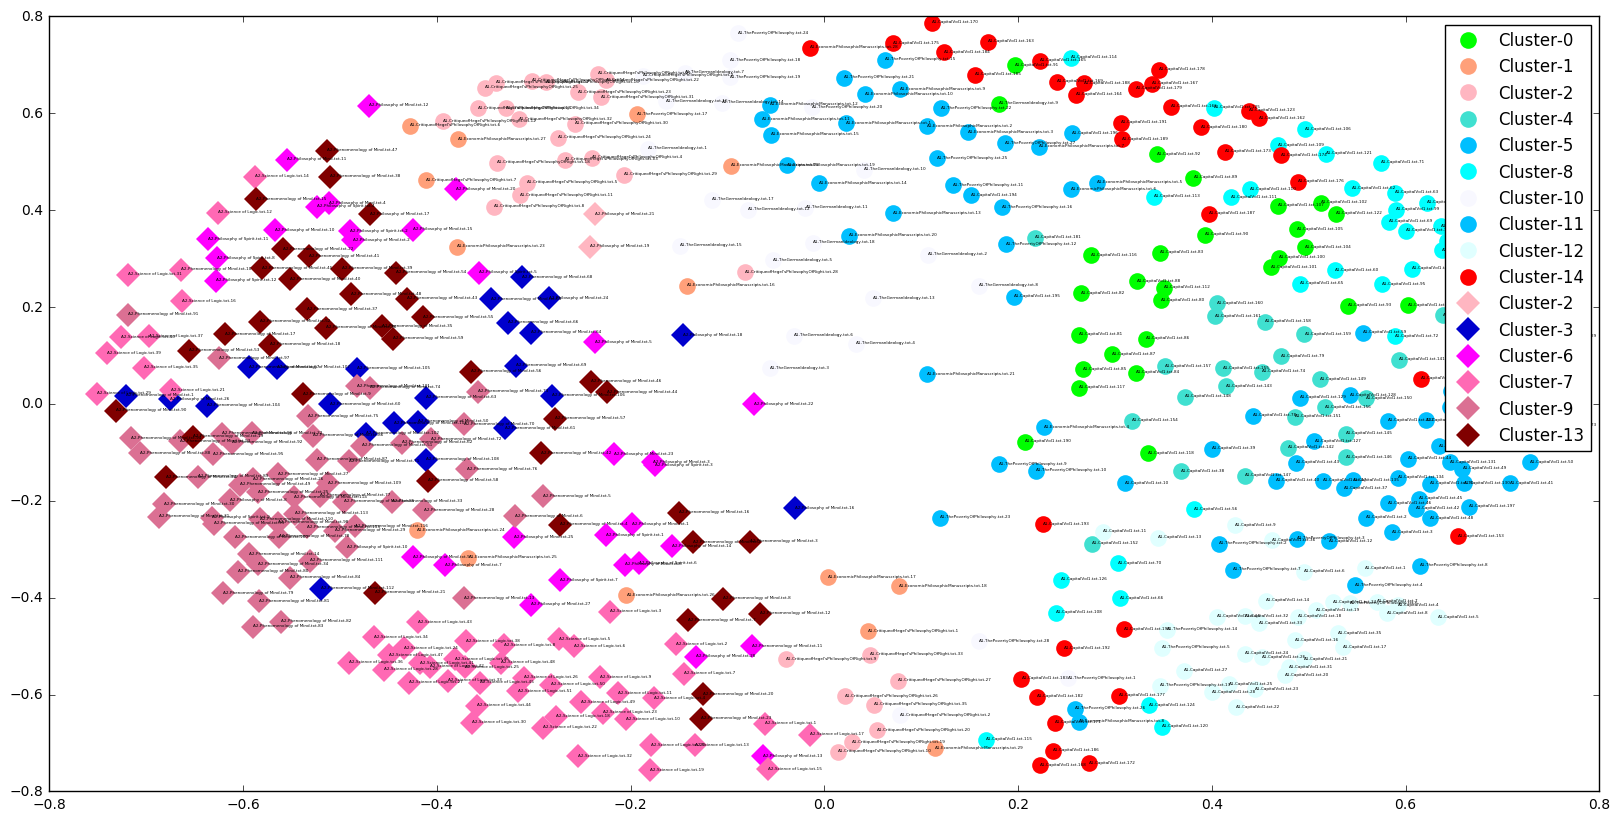

In [123]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10)) # set size
#Marx's books are marked by circles
for name, group in groups_marx:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
        label=cluster_names[name], color=colours[name], 
        mec='none')
#Hegel's books are marked by diamonds
for name, group in groups_hegel:
    ax.plot(group.x, group.y, marker='D', linestyle='', ms=12, 
        label=cluster_names[name], color=colours[name], 
        mec='none')

ax.legend(numpoints=1)  #show legend 

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=3)  


### Ward's Clustering

In [116]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10)) # set size
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=colours[name], 
            mec='none')
    
ax.legend(numpoints=1)  #show legend 

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=3)  dist_matrix=ward(dist)

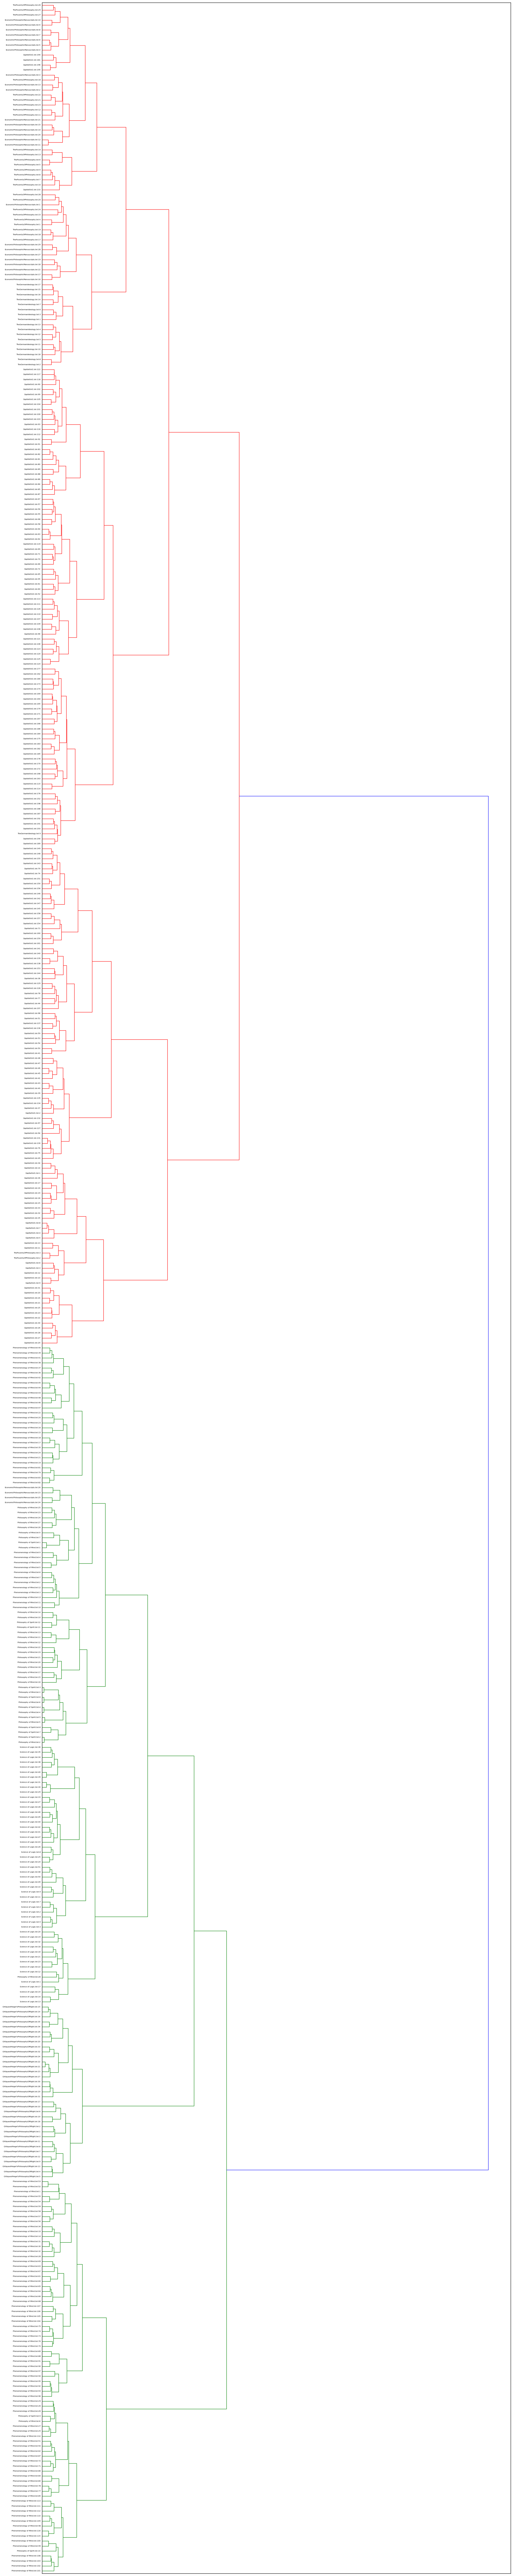

In [117]:
fig, ax = plt.subplots(figsize=(20, 100)) # set size
ax = dendrogram(dist_matrix, orientation="right", labels=ids);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout


### Doc2Vec

Using Gensim's Doc2Vec to generate feature vectors and word embeddings. 

In [125]:
import gensim
from gensim.models.doc2vec import TaggedDocument

Create a list where we will store the tagged documents. Convert text into form that gensim's doc2vec requires it in. 

In [84]:
taggeddoc=[]
text=[]

In [85]:
for i in range(len(books)):
    t=nltk.word_tokenize(books[i])
    text.append(t)
    td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(t))).split(),tags=[u'Doc_{:d}'.format(i)])
    taggeddoc.append(td)

Declaring our model. I have currently set the feature vector size to 200. We will change this and play around later. 

In [86]:
model = gensim.models.Doc2Vec(taggeddoc,alpha=0.025, size= 200, min_alpha=0.025, min_count=0)

Training the model. 

In [87]:
for epoch in range(20):
    if(epoch%5==0):
        print('Now training epoch %s'%epoch)
    model.train(taggeddoc,total_examples=model.corpus_count,epochs=model.iter)
    model.alpha -= 0.002 
    model.min_alpha = model.alpha  

Now training epoch 0
Now training epoch 5
Now training epoch 10
Now training epoch 15


Saving the model so that we do not have to train it every time we run the code. 

In [88]:
model.save('trained.model')
model.save_word2vec_format('trained.word2vec')

Loading the saved corpus. 

In [126]:
model = gensim.models.Doc2Vec.load('trained.model')

Storing the feature vectors in a numpy array and calculating the cosine similarity between docs. 

In [127]:
features=np.zeros((len(books),200))
for i in range(len(books)):
    features[i]=model.docvecs[u'Doc_{:d}'.format(i)]
dist = 1 - cosine_similarity(features)
dist.shape

(515, 515)

K-Means clustering as seen above. The only difference being that we will be using the doc2vec features instead of tfidf vectors. 

In [128]:
num_of_clusters=15
kmeans=KMeans(n_clusters=num_of_clusters)
kmeans.fit(features)
clusters=kmeans.labels_.tolist()

In [129]:
documents = { 'title': ids,  'text': books, 'cluster': clusters, 'author':author }
documentFrame = pd.DataFrame(documents, index = [clusters])
documentFrame

,author,cluster,text,title
3,Marx,3,marx critique hegel philosophy right 1843 crit...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-1
14,Marx,14,even modern nation german status quo open comp...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-2
14,Marx,14,critique hpr intro htm 23 08 2000 18 48 47 mar...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-3
3,Marx,3,invoke historical human title stand one sided ...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-4
3,Marx,3,principle toward determined end it sunders fin...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-5
3,Marx,3,state organism state organism state constituti...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-6
3,Marx,3,2000 18 48 53 note critique hegel philosophy r...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-7
3,Marx,3,division examining particular explanation 274 ...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-8
3,Marx,3,say universal thought ideality whose sorry exi...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-9
3,Marx,3,behind abstraction person quand même instead r...,A1-CritiqueofHegel'sPhilosophyOfRight.txt-10


Visualizing the results using matplotlib after transforming it to 2 dimensions. 

In [130]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=7)
transformed = mds.fit_transform(dist)
x=transformed[:, 0]
y=transformed[:, 1]

x_marx=transformed[:num_marx,0]
y_marx=transformed[:num_marx,1]

x_hegel=transformed[num_marx:,0]
y_hegel=transformed[num_marx:,1]

In [134]:
num_colours=num_of_clusters
col=mpl.colors.cnames.items()
colours={}
random.seed(7)
i=0
while (i<num_of_clusters):
    c=random.choice(list(col))
    if(c[1] not in colours.keys()):
        colours[i]=c[1]
        i=i+1


cluster_names={}
for i in range(num_of_clusters):
    cluster_names[i]="Cluster-"+str(i)

In [132]:
df = pd.DataFrame(dict(x=x, y=y, label=clusters, title=ids,author=author)) 
groups = df.groupby('label')

df_marx=pd.DataFrame(dict(x=x_marx, y=y_marx, label=clusters[:num_marx], title=ids[:num_marx],author=author[:num_marx]))
groups_marx = df_marx.groupby('label')


df_hegel=pd.DataFrame(dict(x=x_hegel, y=y_hegel, label=clusters[num_marx:], title=ids[num_marx:],author=author[num_marx:]))
groups_hegel= df_hegel.groupby('label')

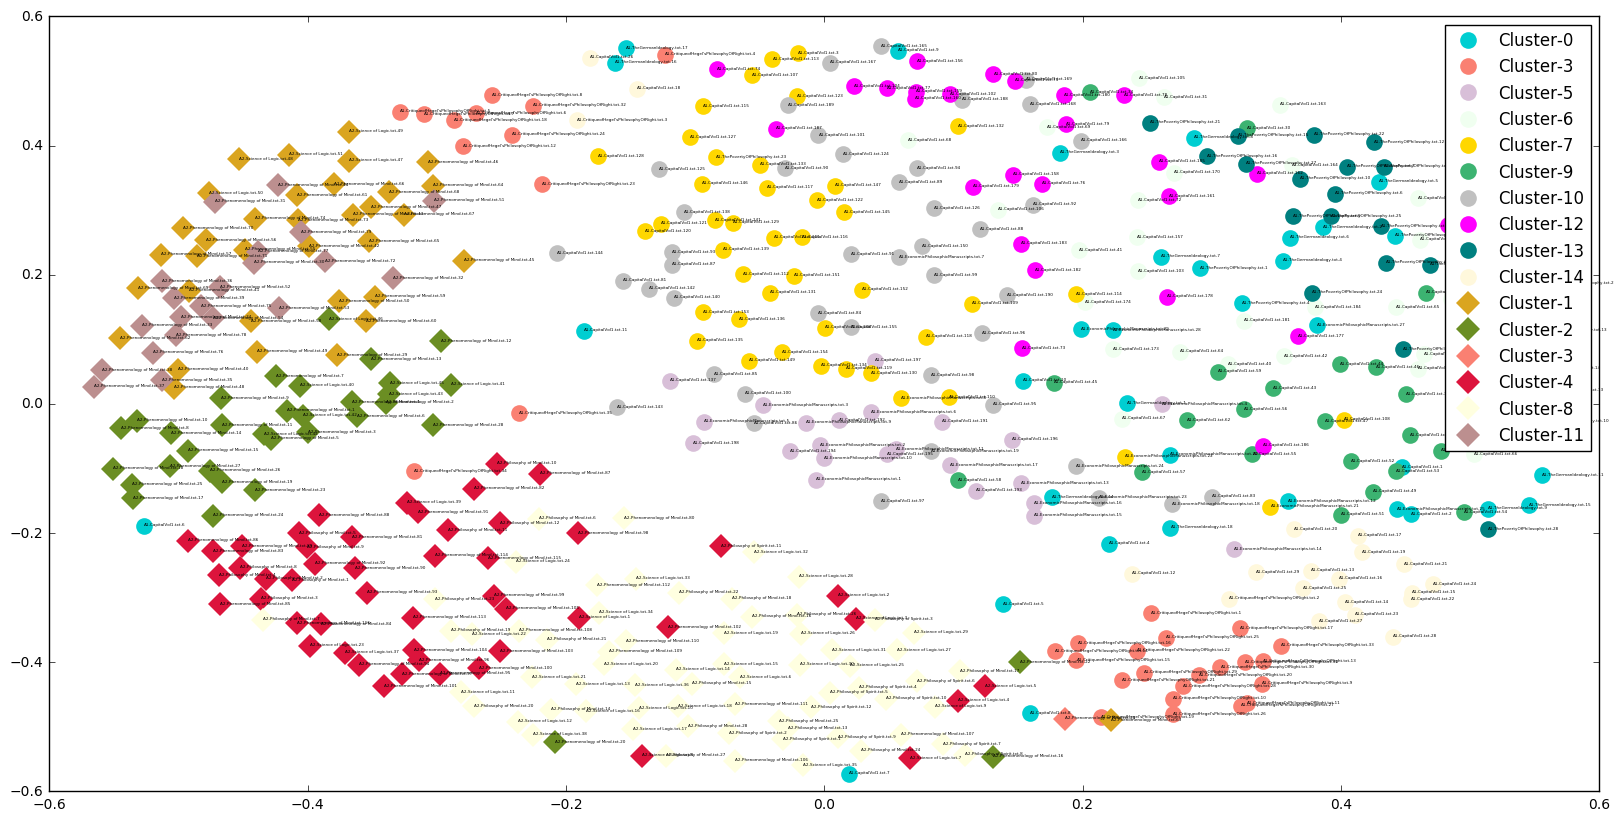

In [135]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10)) # set size
#Marx's books are marked by circles
for name, group in groups_marx:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
        label=cluster_names[name], color=colours[name], 
        mec='none')
#Hegel's books are marked by diamonds
for name, group in groups_hegel:
    ax.plot(group.x, group.y, marker='D', linestyle='', ms=12, 
        label=cluster_names[name], color=colours[name], 
        mec='none')

ax.legend(numpoints=1)  #show legend 

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=3)  


Ward's clustering. 

In [124]:
dist_matrix=ward(dist)

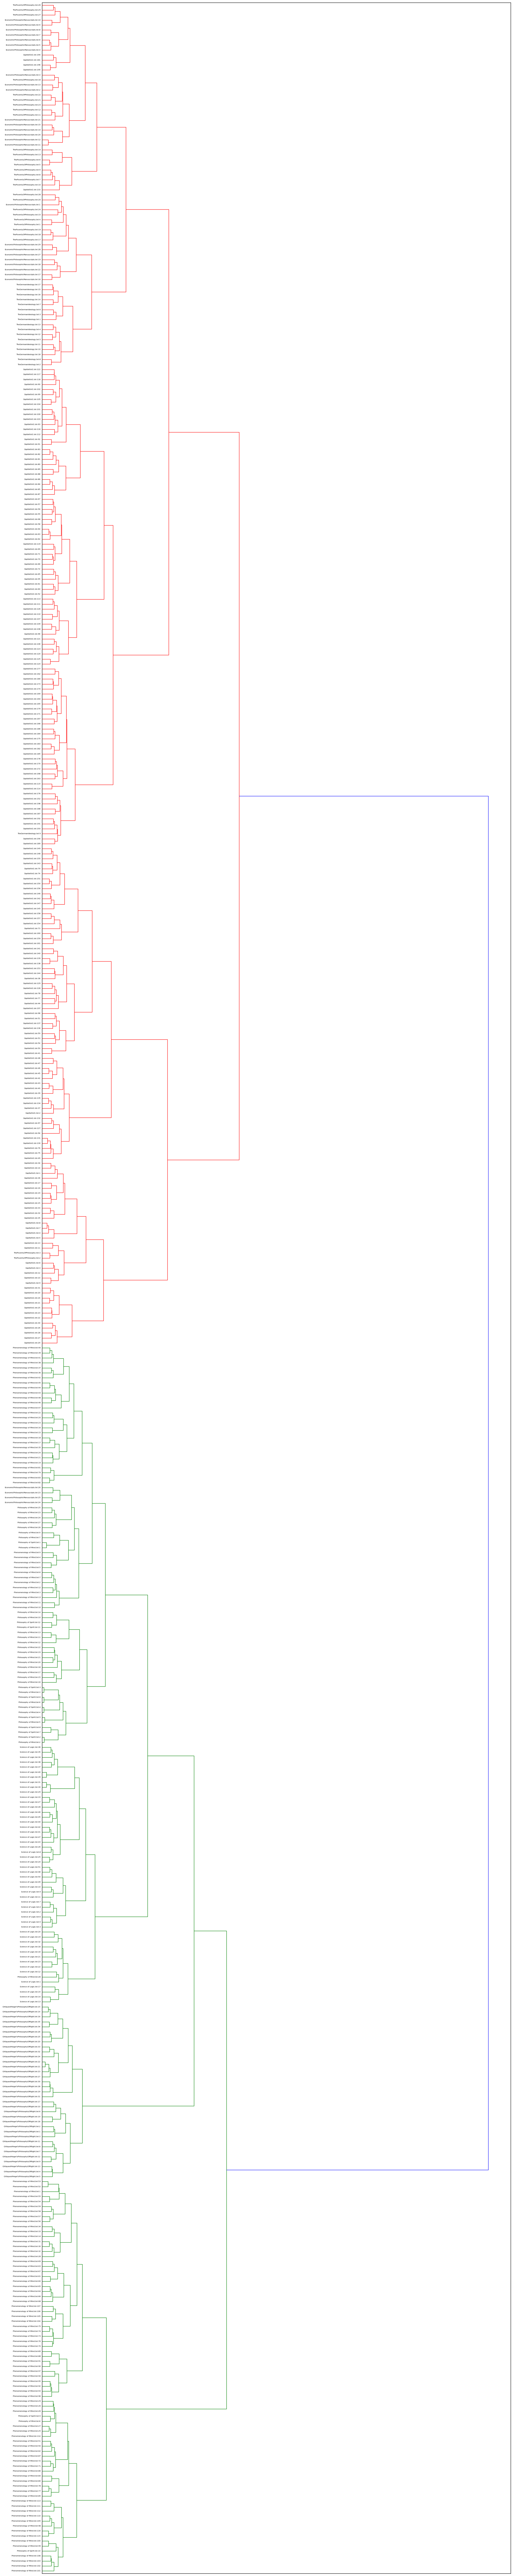

In [125]:
fig, ax = plt.subplots(figsize=(20, 100)) # set size
ax = dendrogram(dist_matrix, orientation="right", labels=ids);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [126]:
model.docvecs.most_similar(u'Doc_{:d}'.format(5))

[('Doc_4', 0.6602965593338013),
 ('Doc_6', 0.6308563351631165),
 ('Doc_16', 0.5380383729934692),
 ('Doc_12', 0.5151400566101074),
 ('Doc_8', 0.49784964323043823),
 ('Doc_29', 0.48733794689178467),
 ('Doc_30', 0.4849054217338562),
 ('Doc_21', 0.47524067759513855),
 ('Doc_343', 0.47341811656951904),
 ('Doc_238', 0.47017258405685425)]